<h1>SARIMA with Prophet<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ресемплирование-ряда:" data-toc-modified-id="Ресемплирование-ряда:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ресемплирование ряда:</a></span></li><li><span><a href="#Разложение-временного-ряда-на-компоненты" data-toc-modified-id="Разложение-временного-ряда-на-компоненты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разложение временного ряда на компоненты</a></span></li><li><span><a href="#График-ACF" data-toc-modified-id="График-ACF-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>График ACF</a></span></li><li><span><a href="#Тест-Дики-Фуллера" data-toc-modified-id="Тест-Дики-Фуллера-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тест Дики-Фуллера</a></span></li><li><span><a href="#Модели-ARIMA-и-SARIMA" data-toc-modified-id="Модели-ARIMA-и-SARIMA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модели ARIMA и SARIMA</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Создание-модели-без-подбора-параметров" data-toc-modified-id="Создание-модели-без-подбора-параметров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание модели без подбора параметров</a></span></li><li><span><a href="#Предсказание-модели" data-toc-modified-id="Предсказание-модели-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Предсказание модели</a></span></li><li><span><a href="#Оценка-метрик" data-toc-modified-id="Оценка-метрик-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Оценка метрик</a></span></li><li><span><a href="#Подбор-параметров-модели" data-toc-modified-id="Подбор-параметров-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Подбор параметров модели</a></span></li><li><span><a href="#Модель-SARIMA-с-подобранными-параметрами" data-toc-modified-id="Модель-SARIMA-с-подобранными-параметрами-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Модель SARIMA с подобранными параметрами</a></span></li><li><span><a href="#Визуализации-диаграммы-диагностики-модели" data-toc-modified-id="Визуализации-диаграммы-диагностики-модели-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Визуализации диаграммы диагностики модели</a></span></li><li><span><a href="#Предсказание-до-конца-года" data-toc-modified-id="Предсказание-до-конца-года-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Предсказание до конца года</a></span></li></ul></li><li><span><a href="#Модель-Prophet" data-toc-modified-id="Модель-Prophet-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Модель Prophet</a></span><ul class="toc-item"><li><span><a href="#Приводим-датафрейм-к-нужному-формату" data-toc-modified-id="Приводим-датафрейм-к-нужному-формату-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Приводим датафрейм к нужному формату</a></span></li><li><span><a href="#Укажем-дни-с-низкой-активностью" data-toc-modified-id="Укажем-дни-с-низкой-активностью-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Укажем дни с низкой активностью</a></span></li><li><span><a href="#Инициализация-модели" data-toc-modified-id="Инициализация-модели-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Инициализация модели</a></span></li><li><span><a href="#Предсказания-модели" data-toc-modified-id="Предсказания-модели-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Предсказания модели</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from datetime import timedelta

from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/Users/alexfil/Desktop/qty.csv', index_col=[0], parse_dates=[0])

In [4]:
data.sort_index(inplace=True)

In [5]:
data.head(5)

,count
repair_date,
2022-01-01,3
2022-01-02,223
2022-01-03,549
2022-01-04,648
2022-01-05,535


### Ресемплирование ряда:

In [8]:
data = data.resample('D').sum()

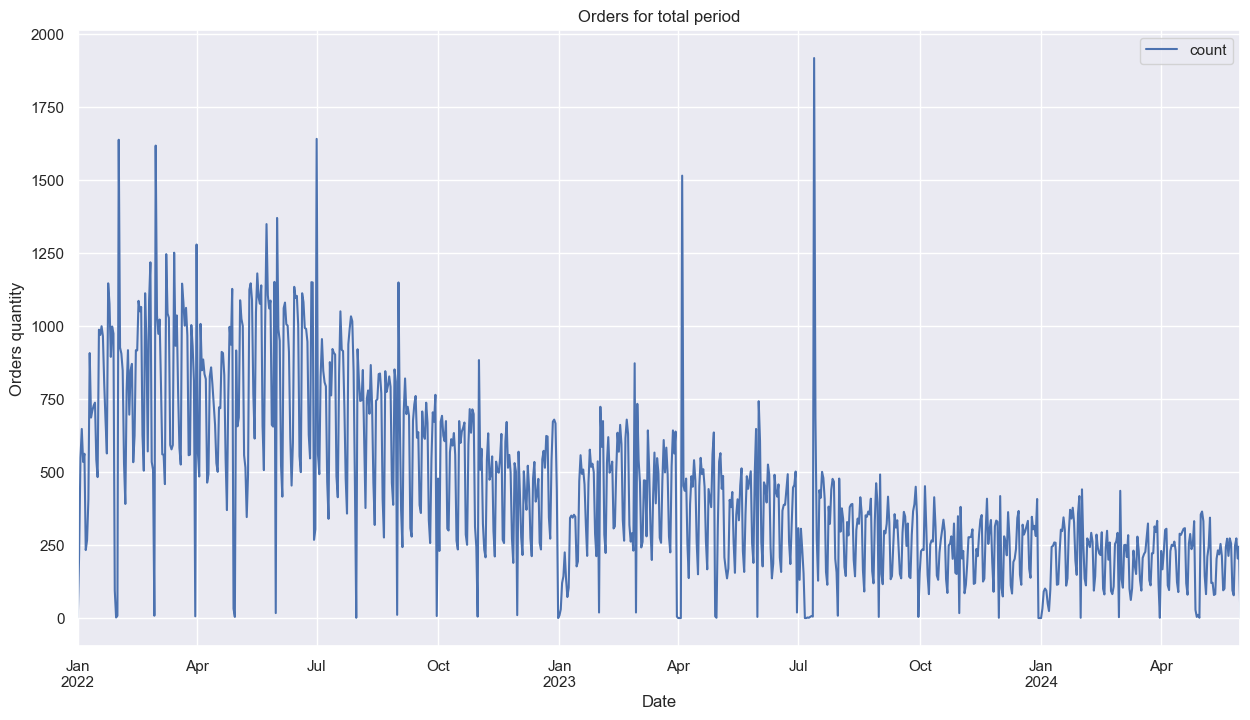

In [9]:
data.plot()
plt.title('Orders for total period')
plt.xlabel('Date')
plt.ylabel('Orders quantity')
plt.show()

### Разложение временного ряда на компоненты

In [10]:
decomposed = seasonal_decompose(data)

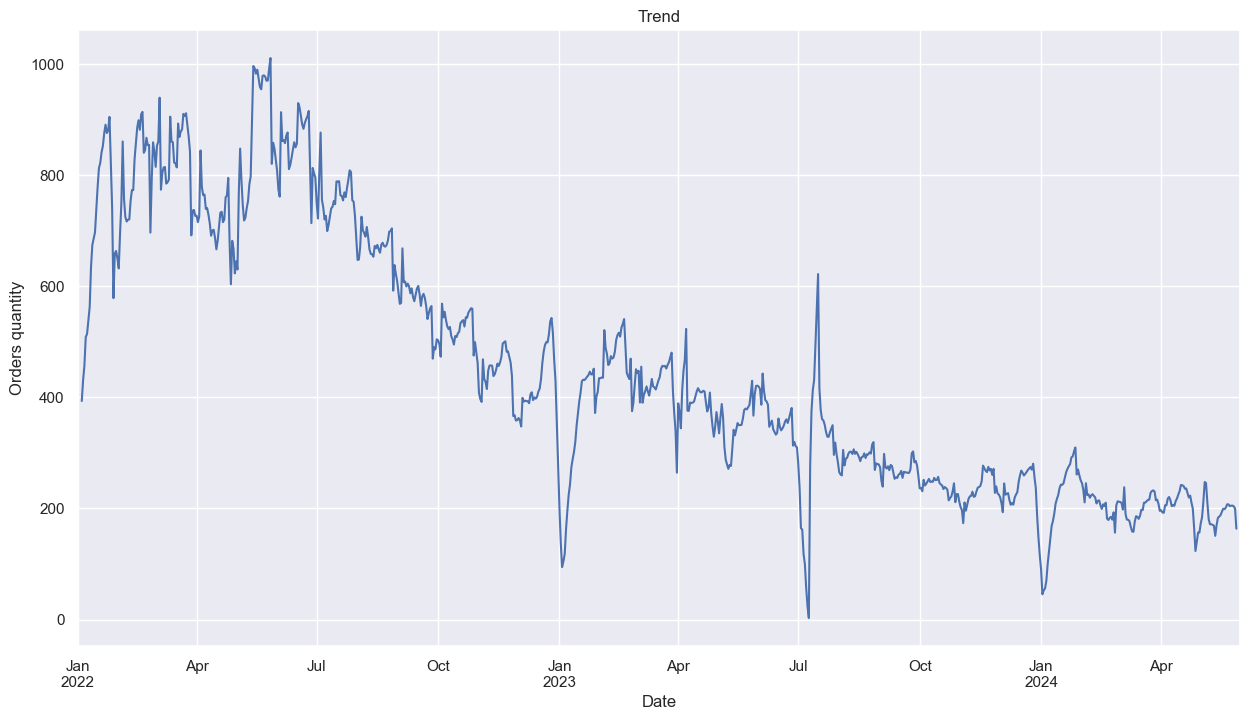

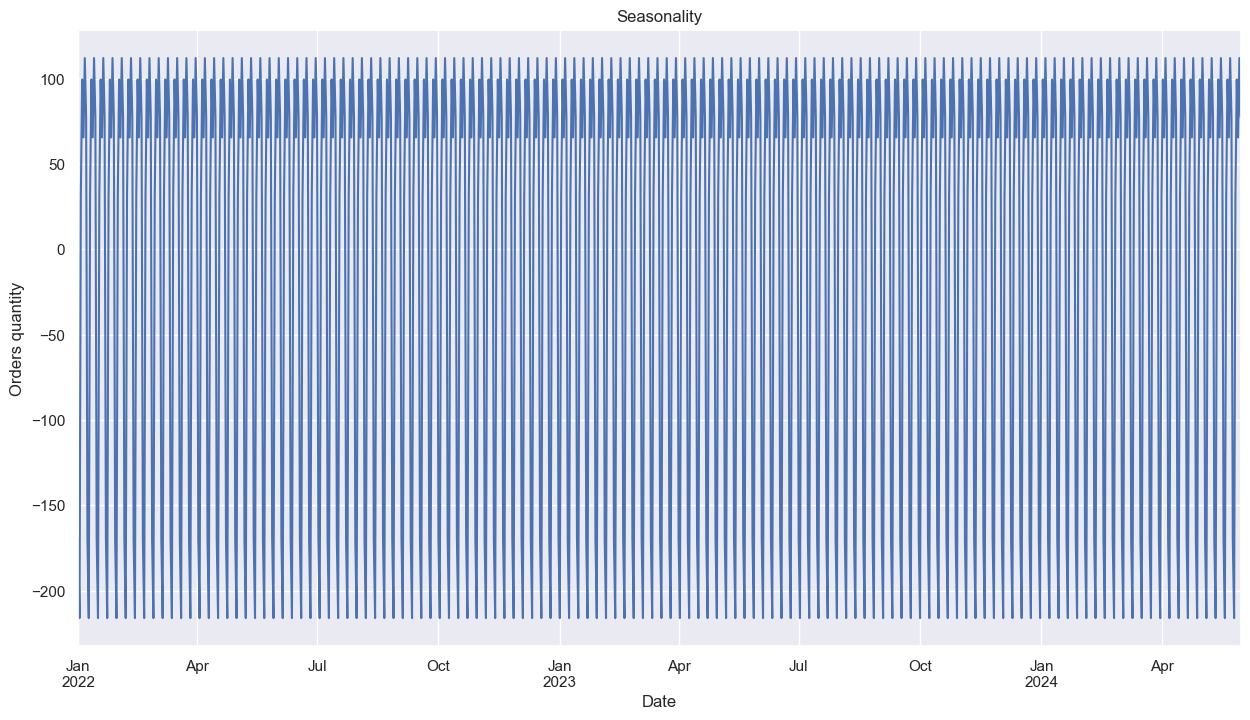

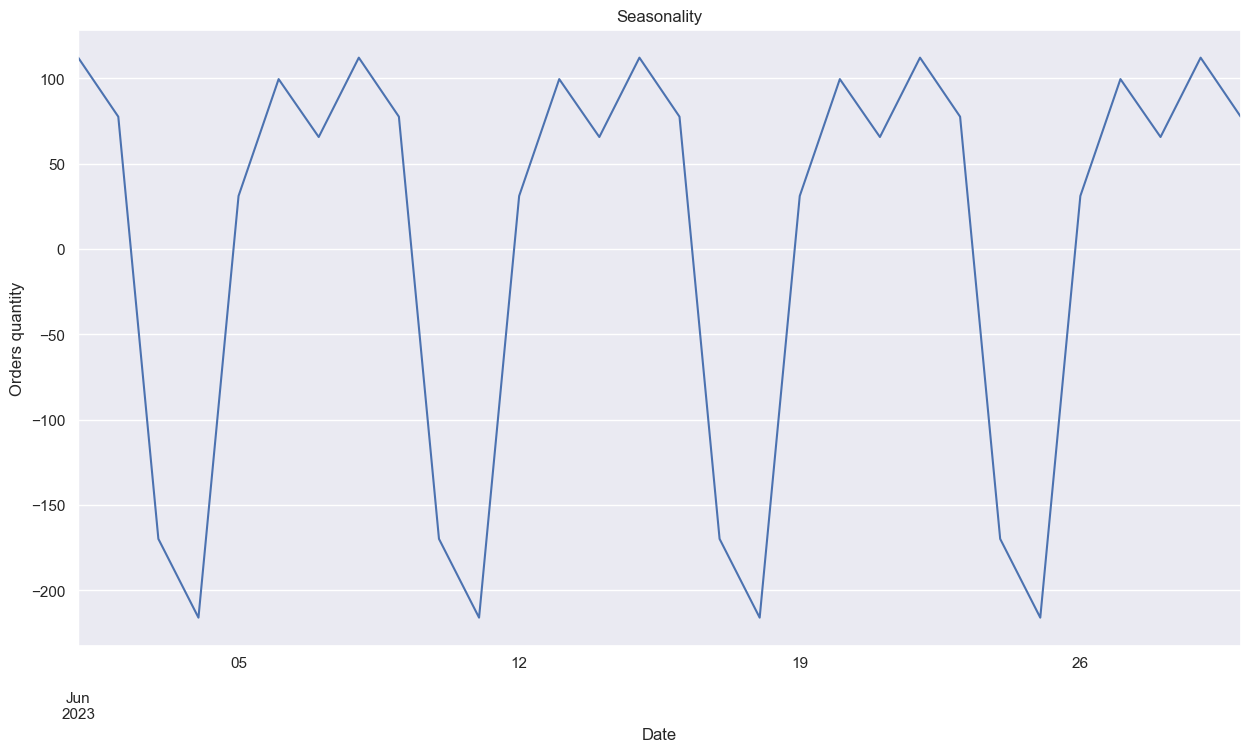

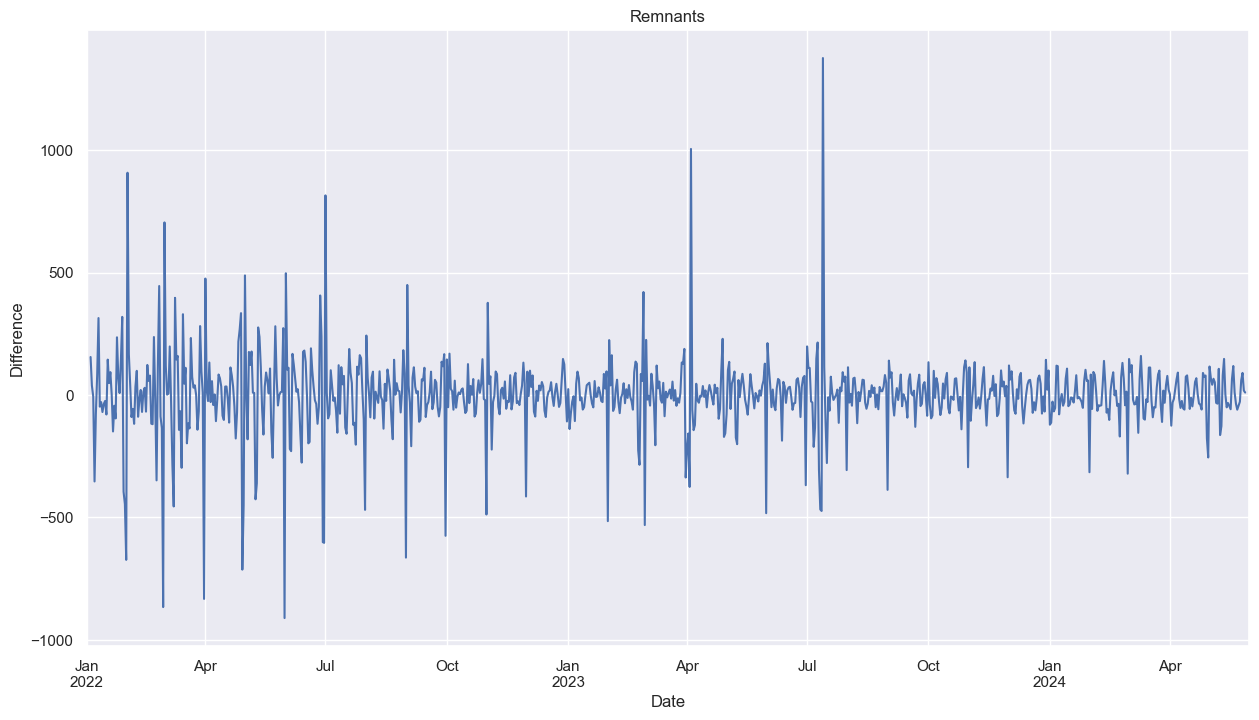

In [11]:
decomposed.trend.plot(ax = plt.gca())
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Orders quantity')
plt.show()

decomposed.seasonal.plot(ax = plt.gca())
plt.title('Seasonality')
plt.xlabel('Date')
plt.ylabel('Orders quantity')
plt.show()

decomposed.seasonal['2023-06-01':'2023-06-30'].plot(ax = plt.gca())
plt.title('Seasonality')
plt.xlabel('Date')
plt.ylabel('Orders quantity')
plt.show()

decomposed.resid.plot(ax = plt.gca())
plt.title('Remnants')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

### График ACF

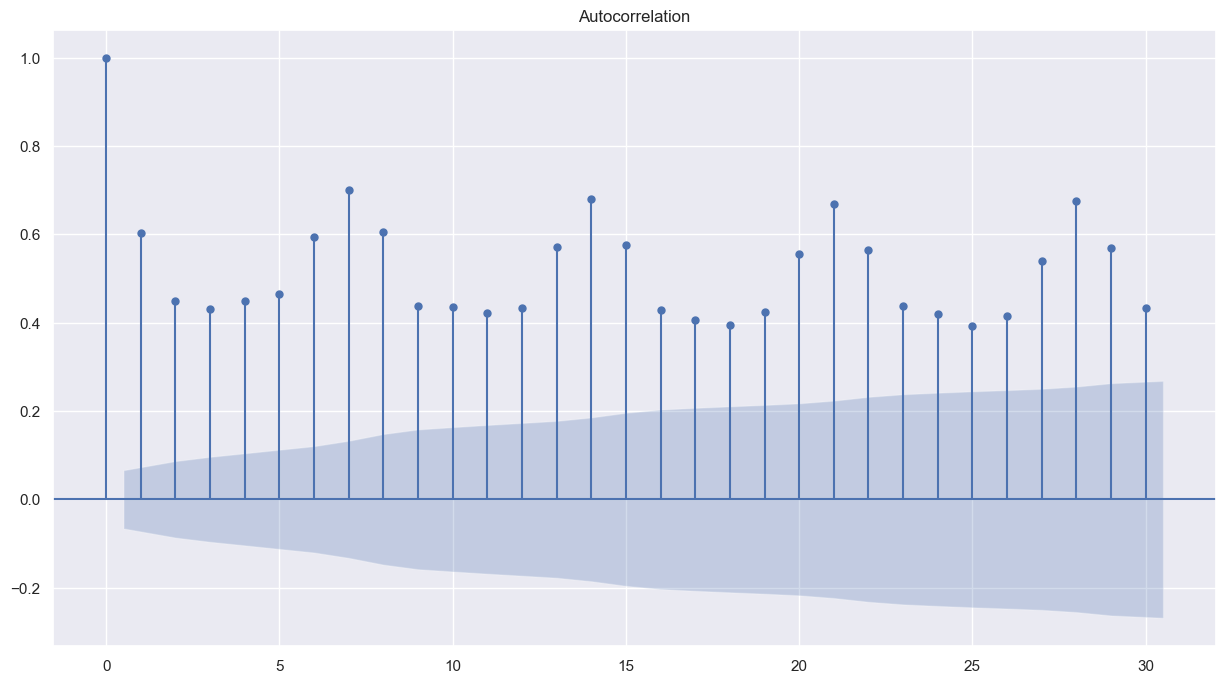

In [12]:
plot_acf(data)
plt.axis('tight')
plt.show()

Автокорреляция позволяет выявлять тренд и сезонность, а также используется при подборе параметров моделей. В частности, мы видим, что лаг 7 сильнее коррелирует с исходным рядом, чем соседние лаги 6 и 8. То же самое можно сказать и про лаги 14 и 21. Такая автокорреляция позволяет предположить наличие (еженедельных) колебаний.

То, что корреляция постоянно положительная говорит о наличии тренда. Все это согласуется с тем, что мы узнали о данных, когда раскладывали их на компоненты.

Также замечу, что синяя граница позволяет оценить статистическую значимость корреляции. Если столбец выходит за ее пределы, то автокорреляция достаточно сильна и ее можно использовать при построении модели.

### Тест Дики-Фуллера 

In [13]:
adf_test = adfuller(data)
 
print('p-value = ' + str(adf_test[1]))

p-value = 0.6769667991050518


p-value для данных существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Ряд нестанионарный.

### Модели ARIMA и SARIMA

Модель ARIMA обычно обозначается как ARIMA (p, d, q), где p, d и q — параметры модели: 

- p — порядок авторегрессии, который описывает количество предыдущих наблюдений, принимаемых во внимание в модели. 

- d — порядок интегрирования, который указывает, сколько раз нужно взять разность временного ряда для достижения стационарности. 

- q — порядок скользящего среднего, который связан с количеством предыдущих ошибок, используемых в модели.

Сезонная модель ARIMA обычно обозначается как SARIMA (p, d, q) (P, D, Q) m, где p, d, q — это несезонные параметры, а P, D, Q — сезонные:

p, d, q работают также, как и в ARIMA.

 - P — порядок сезонной авторегрессии, и он основан на количестве предыдущих сезонов, которые влияют на текущий сезон.

- D — порядок сезонной интеграции, то есть сколько раз нужно продифференцировать данные, чтобы убрать сезонные тренды.

- Q — порядок сезонного скользящего среднего, то есть как много предыдущих сезонных ошибок прогноза используется в модели.

- m — это длина сезонного периода. Например, если данные имеют годовую сезонность и данные собираются ежемесячно, то m будет равно 12. 

Как и ARIMA, SARIMA подходит для прогнозирования динамических рядов, но обладает дополнительной способностью улавливать и моделировать сезонные паттерны в данных.

#### Разделение выборок

In [14]:
# обучающая выборка
train = data[:'2023-12-31']
 
# тестовая выборка
test = data['2024-01-01':]

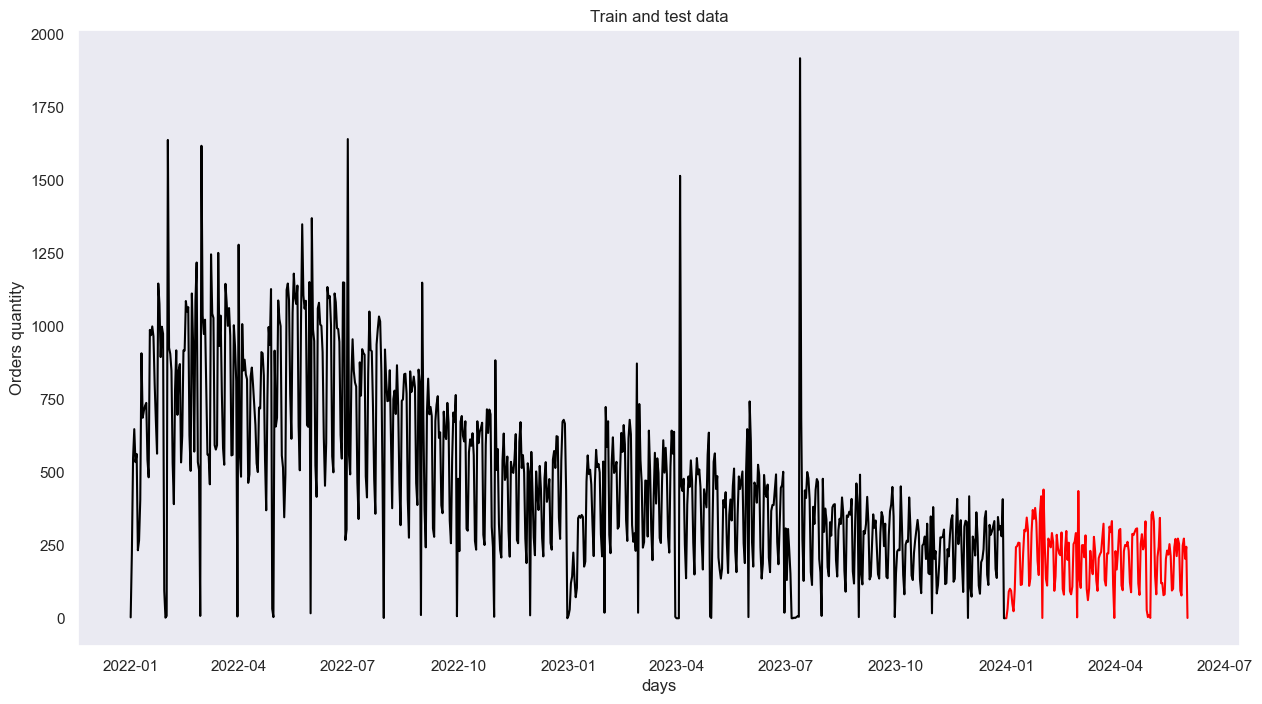

In [15]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Train and test data')
plt.ylabel('Orders quantity')
plt.xlabel('days')
 
# добавим сетку
plt.grid()
 
plt.show()

#### Создание модели без подбора параметров

In [16]:
# обучим модель с соответствующими параметрами, SARIMAX(5, 0, 0)x(1, 0, 0, 12)
model = SARIMAX(train, 
                order = (5, 0, 1), 
                seasonal_order = (1, 0, 0, 12)
               )
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45130D+00    |proj g|=  1.96039D-01


 This problem is unconstrained.



At iterate    5    f=  6.96336D+00    |proj g|=  1.40328D-01

At iterate   10    f=  6.89484D+00    |proj g|=  5.28080D-02

At iterate   15    f=  6.84708D+00    |proj g|=  3.27024D-02

At iterate   20    f=  6.83909D+00    |proj g|=  9.75186D-03

At iterate   25    f=  6.83811D+00    |proj g|=  9.66347D-04

At iterate   30    f=  6.83795D+00    |proj g|=  2.12328D-03

At iterate   35    f=  6.83100D+00    |proj g|=  5.21799D-02

At iterate   40    f=  6.82437D+00    |proj g|=  2.66658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     56      1     0     0   1.140D-04   6.824D+00
  F =   6.82436071831

#### Предсказание модели

In [17]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test)-1
  
# применим метод predict
predictions = result.predict(start, end)

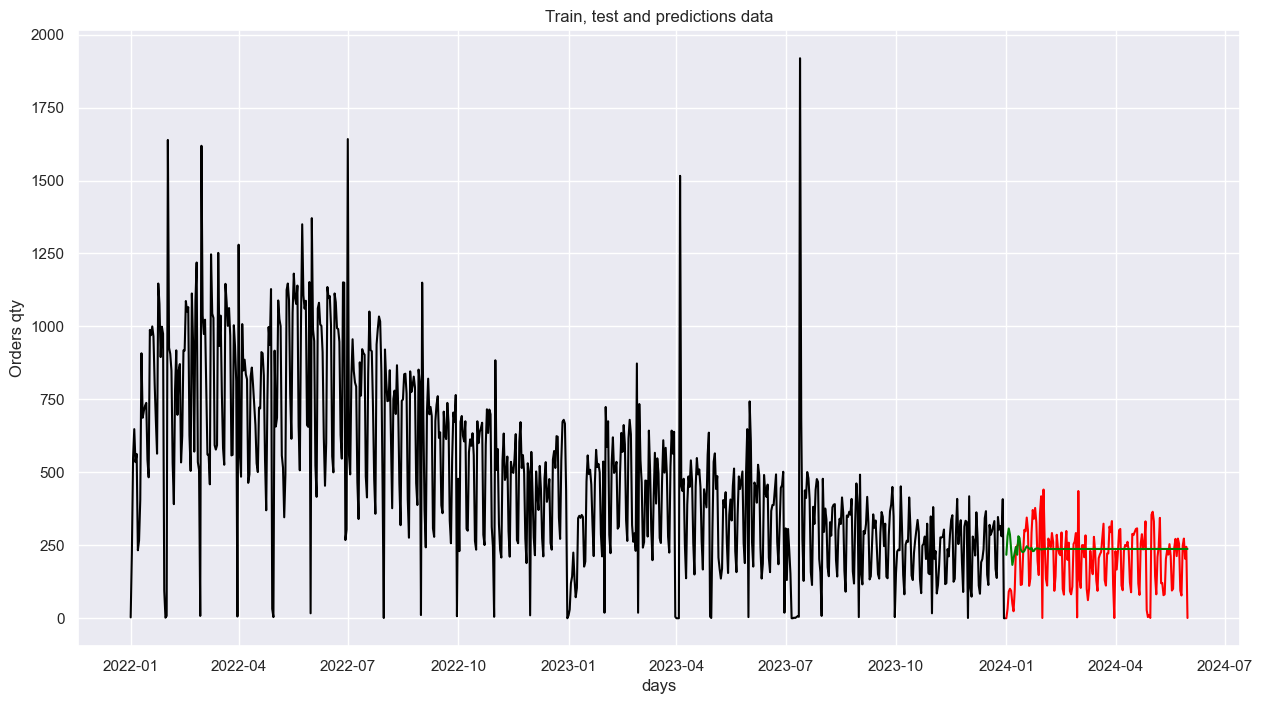

In [18]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
plt.title('Train, test and predictions data')
plt.ylabel('Orders qty')
plt.xlabel('days')
plt.grid(True)
plt.show()

#### Оценка метрик

In [19]:
# рассчитаем MSE
print('MSE: ', mean_squared_error(test.dropna(), predictions))
 
# и RMSE
print('RMSE: ', np.sqrt(mean_squared_error(test.dropna(), predictions)))

MSE:  11776.532498287217
RMSE:  108.51973322067843


#### Подбор параметров модели

In [23]:
stepwise_fit = auto_arima(data, start_p = 1, start_q = 1, 
                          max_p = 10, max_q = 10, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = 0, D = 0, trace = True, 
                          error_action ='ignore',    
                          suppress_warnings = True,  
                          stepwise = True)           
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=11996.401, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12616.184, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12220.768, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12310.185, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13617.964, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=12023.993, Time=0.61 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=12129.695, Time=1.25 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=11996.349, Time=3.62 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=12095.137, Time=3.65 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=12290.991, Time=1.28 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=12211.137, Time=0.45 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=12069.621, Time=3.41 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=11987.178, Time=4.12 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=11970.409, Time=1.60 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  882
Model:             SARIMAX(3, 0, 6)x(1, 0, [1, 2], 12)   Log Likelihood               -5874.049
Date:                                 Fri, 14 Jun 2024   AIC                          11774.098
Time:                                         17:38:10   BIC                          11836.266
Sample:                                     01-01-2022   HQIC                         11797.870
                                          - 05-31-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2432      0.004    596.170      0.000       2.236       2.251
ar.L2         -2.2381      0.006   -349.072      0.000      -2.251      -2.226
ar.L3          0.9948      0.003    299.445      0.000       0.988       1.001
ma.L1         -2.1805      0.027    -81.800      0.000      -2.233      -2.128
ma.L2          2.0872      0.078     26.691      0.000       1.934       2.240
ma.L3         -0.7176      0.127     -5.629      0.000      -0.967      -0.468
ma.L4         -0.2965      0.143     -2.073      0.038      -0.577      -0.016
ma.L5          0.2103      0.108      1.950      0.051      -0.001       0.422
ma.L6         -0.0480      0.044     -1.080      0.280      -0.135       0.039
ar.S.L12       0.9317      0.062     14.956      0.000       0.810       1.054
ma.S.L12      -1.0436      0.081    -12.863      0.000      -1.203      -0.885
ma.S.L24       0.1446      0.051      2.817      0.005       0.044       0.245
sigma2      4.404e+04   1474.144     29.877      0.000    4.12e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              5601.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Модель SARIMA с подобранными параметрами

In [24]:
model_tuned = SARIMAX(data,  
                order = (3, 0, 6),  
                seasonal_order =(1, 0, [1, 2], 12)) 
  
result = model_tuned.fit() 
result.summary() 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77870D+00    |proj g|=  1.74365D-01

At iterate    5    f=  6.74049D+00    |proj g|=  2.93330D-02

At iterate   10    f=  6.72796D+00    |proj g|=  1.11784D-01

At iterate   15    f=  6.69756D+00    |proj g|=  1.18955D-01

At iterate   20    f=  6.68501D+00    |proj g|=  4.93928D-02

At iterate   25    f=  6.66988D+00    |proj g|=  2.81758D-01

At iterate   30    f=  6.66371D+00    |proj g|=  3.32620D-02

At iterate   35    f=  6.66326D+00    |proj g|=  1.80242D-02

At iterate   40    f=  6.66226D+00    |proj g|=  4.27114D-02

At iterate   45    f=  6.66148D+00    |proj g|=  1.21693D-01

At iterate   50    f=  6.65992D+00    |proj g|=  4.57237D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/alexfil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   count   No. Observations:                  882
Model:             SARIMAX(3, 0, 6)x(1, 0, [1, 2], 12)   Log Likelihood               -5874.049
Date:                                 Fri, 14 Jun 2024   AIC                          11774.098
Time:                                         17:39:03   BIC                          11836.266
Sample:                                     01-01-2022   HQIC                         11797.870
                                          - 05-31-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2432      0.004    596.170      0.000       2.236       2.251
ar.L2         -2.2381      0.006   -349.072      0.000      -2.251      -2.226
ar.L3          0.9948      0.003    299.445      0.000       0.988       1.001
ma.L1         -2.1805      0.027    -81.800      0.000      -2.233      -2.128
ma.L2          2.0872      0.078     26.691      0.000       1.934       2.240
ma.L3         -0.7176      0.127     -5.629      0.000      -0.967      -0.468
ma.L4         -0.2965      0.143     -2.073      0.038      -0.577      -0.016
ma.L5          0.2103      0.108      1.950      0.051      -0.001       0.422
ma.L6         -0.0480      0.044     -1.080      0.280      -0.135       0.039
ar.S.L12       0.9317      0.062     14.956      0.000       0.810       1.054
ma.S.L12      -1.0436      0.081    -12.863      0.000      -1.203      -0.885
ma.S.L24       0.1446      0.051      2.817      0.005       0.044       0.245
sigma2      4.404e+04   1474.144     29.877      0.000    4.12e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              5601.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Визуализации диаграммы диагностики модели

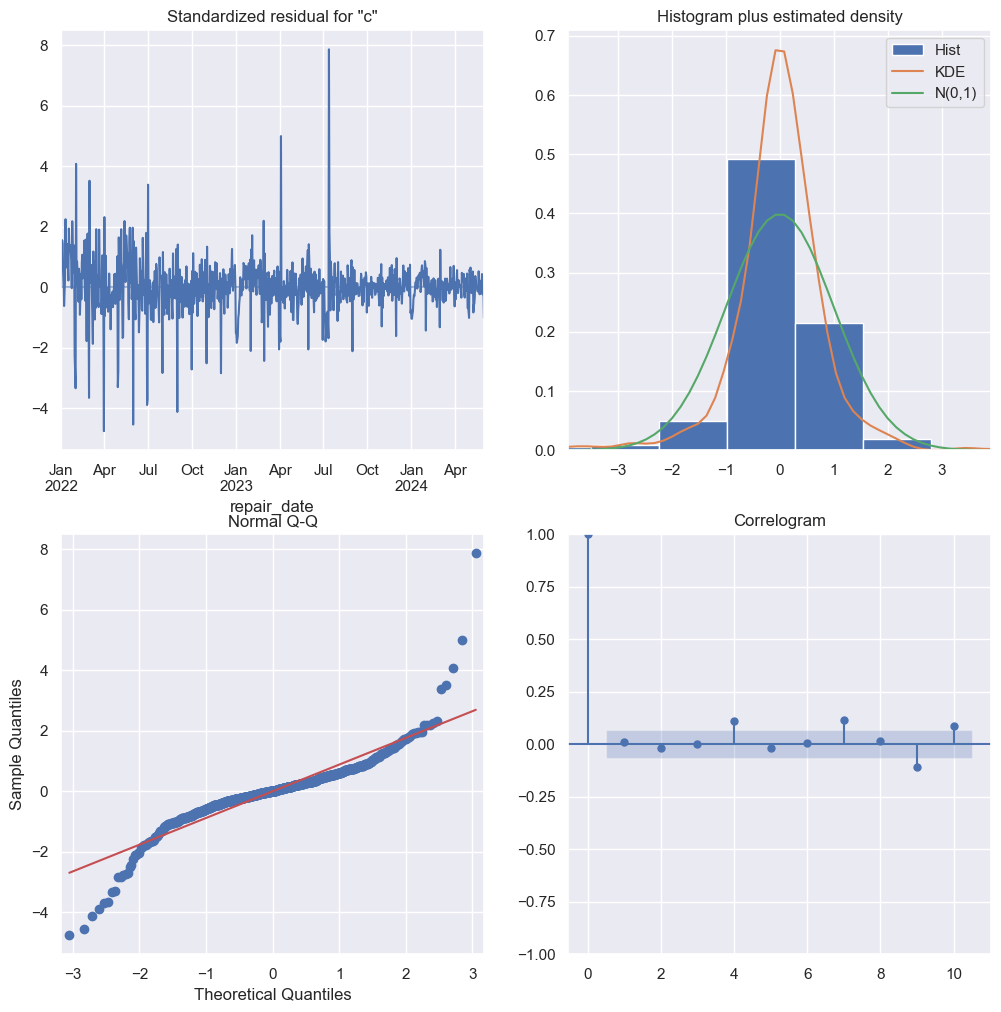

In [25]:
result.plot_diagnostics(figsize=(12, 12))
plt.show()

In [26]:
predictions_tuned = result.predict(start, end)

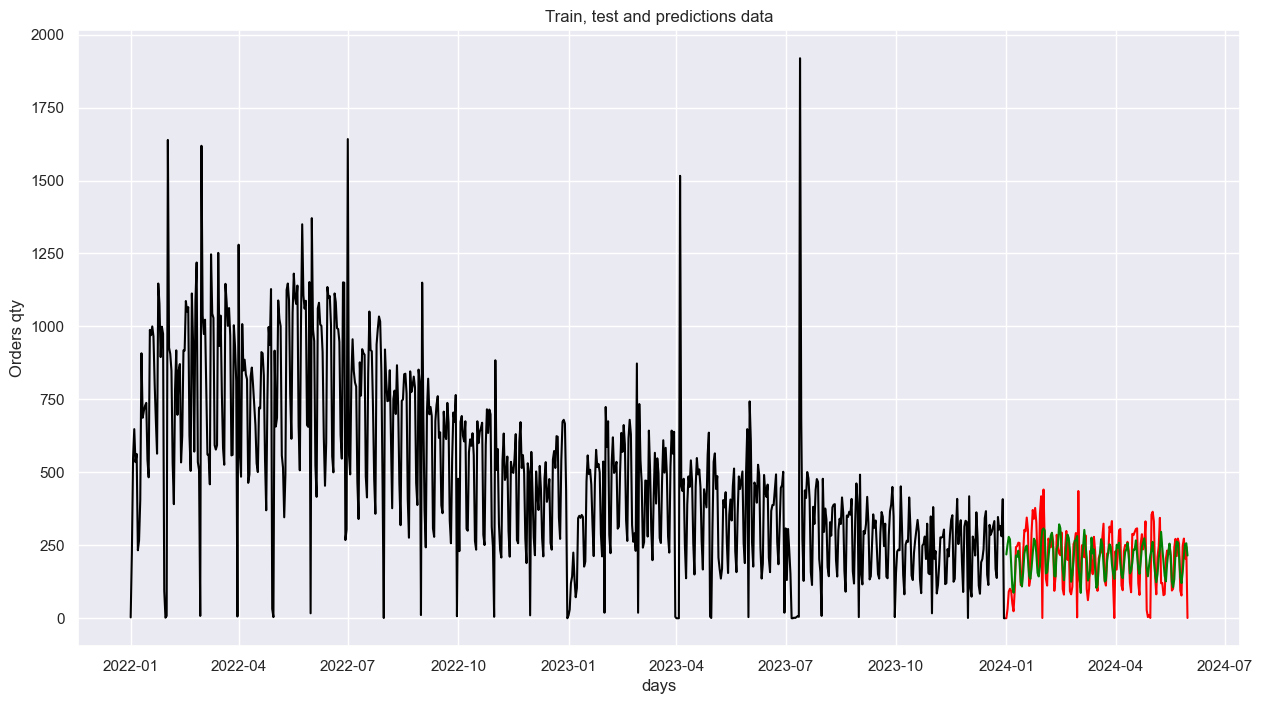

In [27]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions_tuned, color = "green")
 
plt.title('Train, test and predictions data')
plt.ylabel('Orders qty')
plt.xlabel('days')
plt.grid(True)
plt.show()

In [28]:
# рассчитаем MSE
print('MSE: ', mean_squared_error(test.dropna(), predictions_tuned))
 
# и RMSE
print('RMSE: ', np.sqrt(mean_squared_error(test.dropna(), predictions_tuned)))

MSE:  8037.81652893024
RMSE:  89.65387068571128


####   Предсказание до конца года

In [29]:
predictions_tuned = result.predict(start, end+214)

In [30]:
predictions_tuned.tail(10)

2024-12-22    116.011021
2024-12-23    136.295408
2024-12-24    175.206498
2024-12-25    200.842811
2024-12-26    193.926116
2024-12-27    161.933634
2024-12-28    125.077745
2024-12-29    114.857373
2024-12-30    138.093389
2024-12-31    175.775074
Freq: D, Name: predicted_mean, dtype: float64

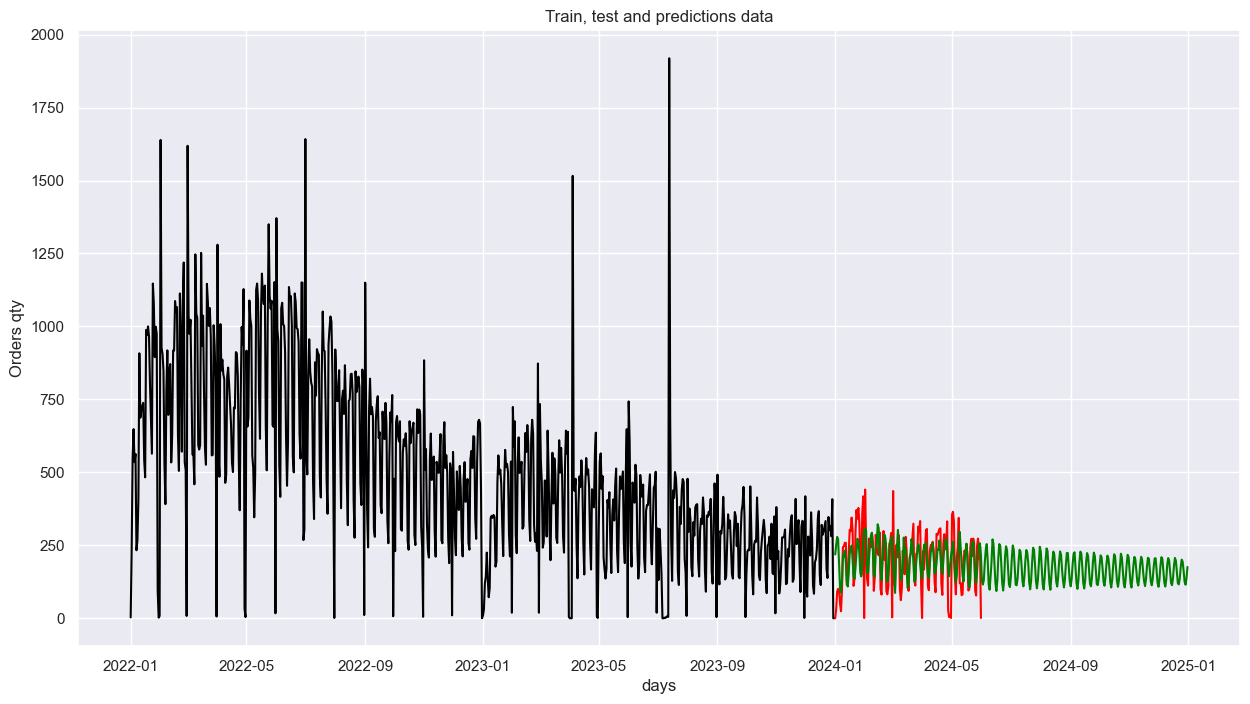

In [31]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions_tuned, color = "green")
 
plt.title('Train, test and predictions data')
plt.ylabel('Orders qty')
plt.xlabel('days')
plt.grid(True)
plt.show()

### Модель Prophet

####  Приводим датафрейм к нужному формату

In [32]:
data_pr = pd.read_csv('/Users/alexfil/Desktop/qty.csv', index_col=[0], parse_dates=[0])
data_pr.sort_index(inplace=True)
data_pr = data_pr.resample('D').sum()

In [33]:
data_pr = data.reset_index()
data_pr.columns = ['ds', 'y']

#### Укажем дни с низкой активностью

In [34]:
lowdays = pd.DataFrame({
  'holiday': 'lowdays',
  'ds': pd.to_datetime(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
                        '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
                        '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
                        '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
                        '2024-01-31', '2024-02-28', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
                        '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})

#### Инициализация модели

In [35]:
pr = Prophet(seasonality_mode='multiplicative', holidays=lowdays)
pr.fit(data_pr)

17:40:37 - cmdstanpy - INFO - Chain [1] start processing
17:40:37 - cmdstanpy - INFO - Chain [1] done processing


#### Предсказания модели

In [36]:
future_dates = pr.make_future_dataframe(periods=0, freq='D')

In [37]:
forecast = pr.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
872,2024-05-22,246.884992,85.008681,408.908509
873,2024-05-23,261.540999,91.022590,436.104061
874,2024-05-24,244.679459,85.113462,428.473040
875,2024-05-25,156.301319,-1.962636,318.546105
876,2024-05-26,138.582208,-25.762276,300.025689
877,2024-05-27,235.593699,69.915736,403.848069
878,2024-05-28,255.122717,72.876447,435.860779
879,2024-05-29,242.143145,64.789393,418.741293
880,2024-05-30,256.284099,76.743236,425.877591
881,2024-05-31,61.929664,-119.506674,221.716469


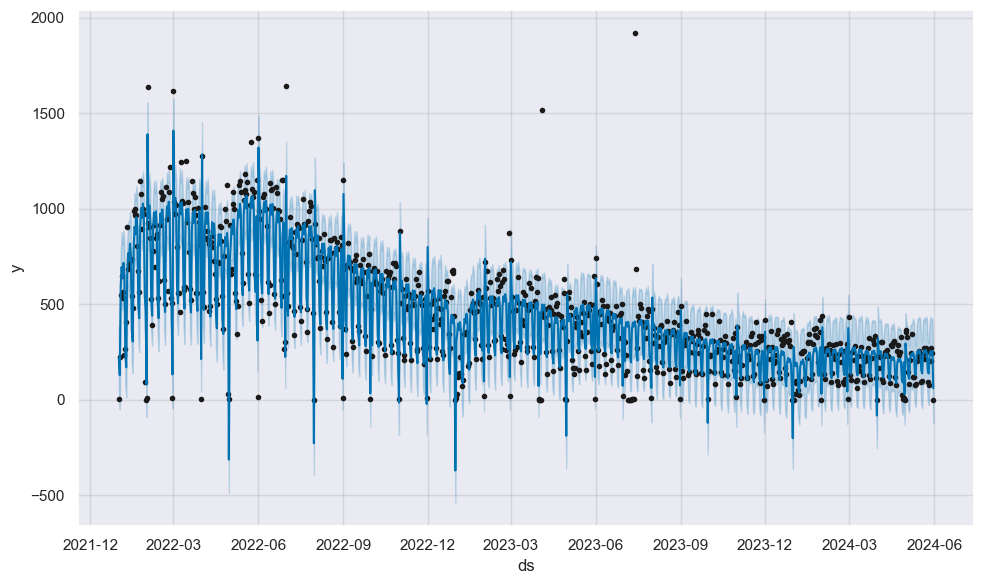

In [38]:
pr.plot(forecast, uncertainty=True)
pass

In [40]:
# рассчитаем MSE
print('MSE: ', mean_squared_error(data_pr['y'], forecast['yhat']))
 
# и RMSE
print('RMSE: ', np.sqrt(mean_squared_error(data_pr['y'], forecast['yhat'])))

MSE:  17395.93739219348
RMSE:  131.89365940860645


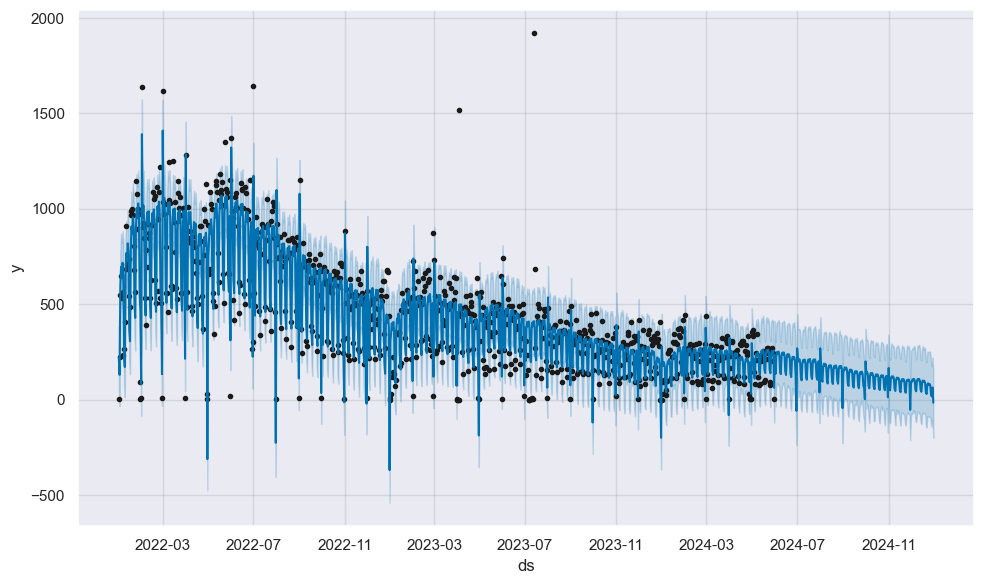

In [43]:
future_dates = pr.make_future_dataframe(periods=214, freq='D')
forecast = pr.predict(future_dates)
pr.plot(forecast, uncertainty=True)
pass

In [44]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, holidays, holidays_lower, holidays_upper, lowdays, lowdays_lower, lowdays_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, additive_terms, additive_terms_lower, additive_terms_upper, yhat


In [46]:
cmp = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data_pr.set_index('ds'))

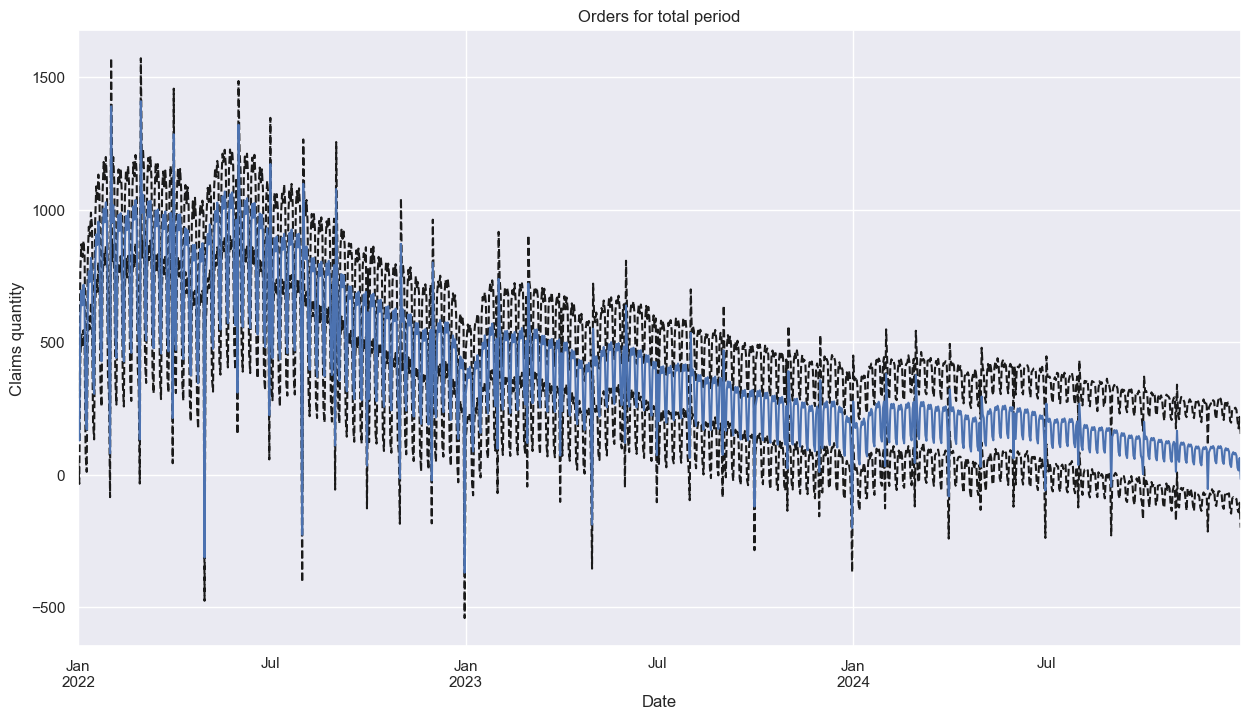

In [47]:
cmp['yhat_upper'].plot(style='k--')
cmp['yhat_lower'].plot(style='k--')
cmp['yhat'].plot()
plt.title('Orders for total period')
plt.xlabel('Date')
plt.ylabel('Claims quantity')
plt.show()

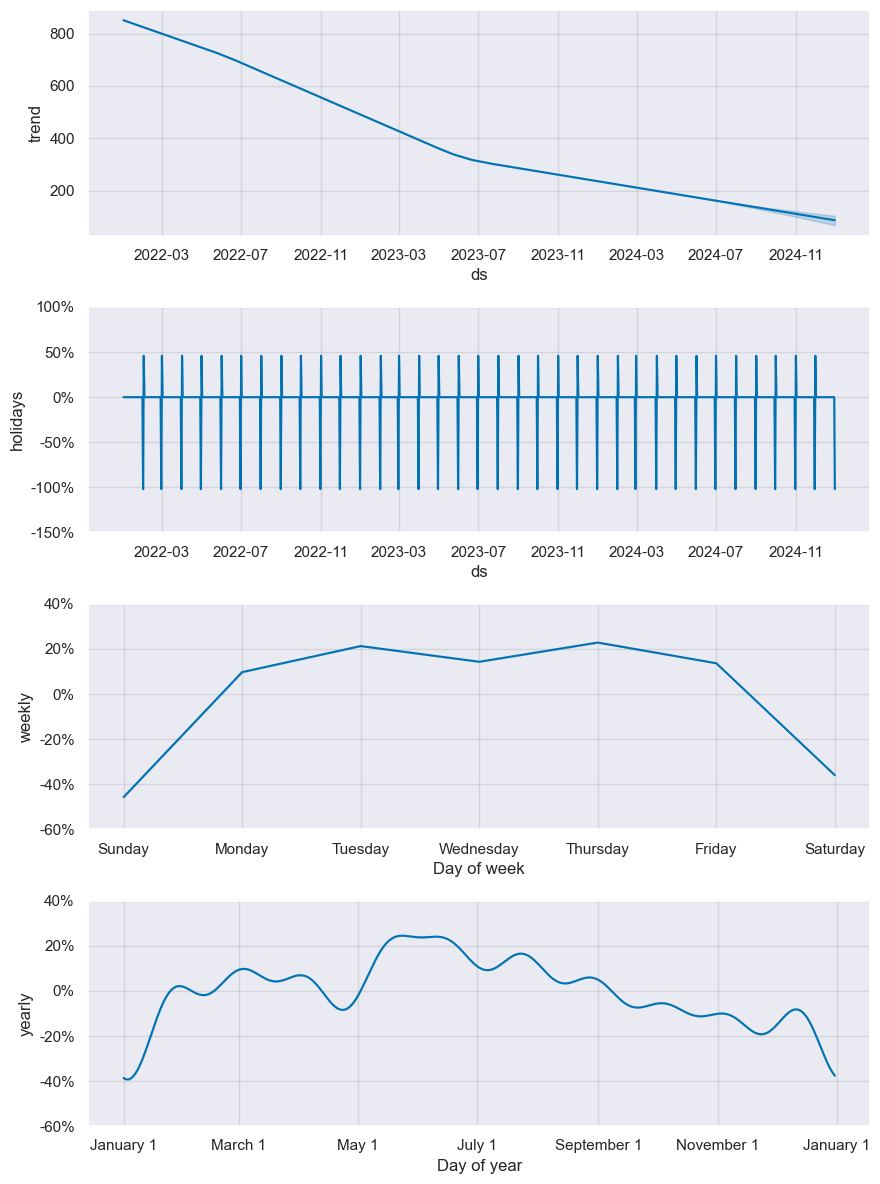

In [48]:
pr.plot_components(forecast)
pass